### Task 1: Read and standardize the json files in a way that facilitates further analysis 

In [1]:
# import packages relevant to this project
import pandas as pd
import os, json
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
import numpy as np
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from gensim.models import CoherenceModel
import pyLDAvis.gensim_models
import pyLDAvis
import nltk 
import random

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Prudvi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Import the CSV data and merge it with the json files in the dataset

In [2]:
# import CSV data
aviation = pd.read_csv('G://My Drive//Job Search//Technical Exercises//RTI//desktop//data-scientist-exercise02//data//AviationData.csv')

# import json data
path_to_json = 'G://My Drive//Job Search//Technical Exercises//RTI//desktop//data-scientist-exercise02//data//'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
# print(json_files)  # checking to see if all json files were captured correctly

# initialize empty lists to capture all the data from the json files
event_id_list = []
narrative_list = []
probable_cause_list = []

# This for loop loops through all the json files in the data directory and creates three lists for the relevant information 
# in every json file. 
for index, js in enumerate(json_files):
    with open(os.path.join(path_to_json, js)) as json_file:
        json_text = json.load(json_file)
        json_len = len(json_text['data'])
        for i in range(0,json_len):
            event_id = json_text['data'][i]['EventId']
            narrative = json_text['data'][i]['narrative']
            probable_cause = json_text['data'][i]['probable_cause']
            event_id_list.append(event_id)
            narrative_list.append(narrative)
            probable_cause_list.append(probable_cause)

# create the final dataframe that comtains all the data from the json files 
jsons_df = pd.DataFrame({'EventId':event_id_list, 'narrative':narrative_list, 'probable_cause_list':probable_cause_list})

# Create the final df which is a merge of the aviation df and the jsons df
aviation = aviation.merge(jsons_df, on = 'EventId', how = 'left')

### Task 2: Prepare descriptive statistics that convey an overview of the unstructured data

Start with just getting a sense of numerical and non numerical variables in the dataset as well as proportion of missing variables

In [3]:
aviation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77257 entries, 0 to 77256
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EventId               77257 non-null  object 
 1   InvestigationType     77257 non-null  object 
 2   AccidentNumber        77257 non-null  object 
 3   EventDate             77254 non-null  object 
 4   Location              77176 non-null  object 
 5   Country               76747 non-null  object 
 6   Latitude              23761 non-null  float64
 7   Longitude             23752 non-null  float64
 8   AirportCode           43363 non-null  object 
 9   AirportName           46094 non-null  object 
 10  InjurySeverity        77151 non-null  object 
 11  AircraftDamage        74873 non-null  object 
 12  AircraftCategory      16520 non-null  object 
 13  RegistrationNumber    74498 non-null  object 
 14  Make                  77168 non-null  object 
 15  Model              

In [4]:
# convert event date and publication date to a datetime
aviation['EventDate'] = pd.to_datetime(aviation['EventDate'])
aviation['PublicationDate'] = pd.to_datetime(aviation['PublicationDate'])

Check out some of the continuous variables in the dataset

           Latitude     Longitude  NumberOfEngines  TotalFatalInjuries  \
count  23761.000000  23752.000000     73336.000000        55791.000000   
mean      37.744819    -93.807654         1.149095            0.788962   
std       12.022069     39.510021         0.463222            6.087442   
min      -78.016945   -193.216667         0.000000            0.000000   
25%       33.416389   -115.134444         1.000000            0.000000   
50%       38.190555    -94.660555         1.000000            0.000000   
75%       42.572223    -81.761944         1.000000            1.000000   
max       89.218056    177.557778        24.000000          349.000000   

       TotalSeriousInjuries  TotalMinorInjuries  TotalUninjured          year  \
count          53744.000000        54733.000000    65862.000000  77254.000000   
mean               0.309895            0.492555        5.716817   1996.250796   
std                1.368488            2.779814       29.052413      9.760909   
min      

(0.0, 50.0)

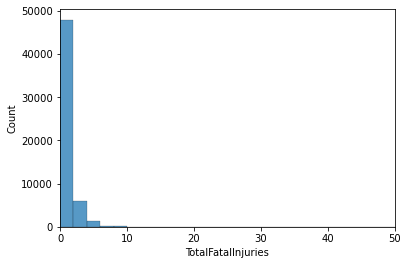

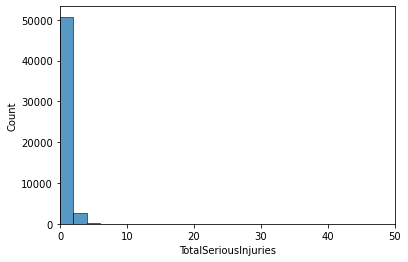

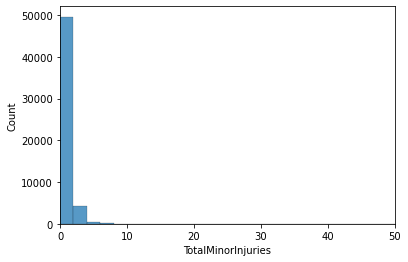

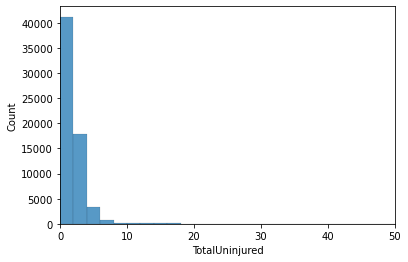

In [66]:
print(aviation.describe())

plt.figure()
sns.histplot(data = aviation, x = 'TotalFatalInjuries', binwidth = 2)
plt.xlim(0, 50)

plt.figure()
sns.histplot(data = aviation, x = 'TotalSeriousInjuries', binwidth = 2)
plt.xlim(0, 50)

plt.figure()
sns.histplot(data = aviation, x = 'TotalMinorInjuries', binwidth = 2)
plt.xlim(0, 50)

plt.figure()
sns.histplot(data = aviation, x = 'TotalUninjured', binwidth = 2)
plt.xlim(0, 50)

Check out the categorical variables within the dataset

In [64]:
# Get value counts of all the categorical variables. These variables have been selected by opening the dataframe in the variable explorer and getting a sense of what is in each column
cat_var = ['InvestigationType', 'Location', 'Country', 'AirportCode', 'AirportName', 'InjurySeverity', 'AircraftDamage', 'AircraftCategory', 'Make', 'Model', 
           'AmateurBuilt', 'NumberOfEngines', 'EngineType', 'FARDescription', 'Schedule', 'PurposeOfFlight', 'AirCarrier', 'WeatherCondition', 'BroadPhaseOfFlight',
           'ReportStatus']

for var in cat_var:
    print(aviation[var].value_counts())

Accident    74207
Incident     3050
Name: InvestigationType, dtype: int64
ANCHORAGE, AK       372
MIAMI, FL           185
CHICAGO, IL         169
ALBUQUERQUE, NM     164
HOUSTON, TX         155
                   ... 
RIDGE SPRING, SC      1
Spanoway, WA          1
TEMPLE BAR, NV        1
HEATHSVILLE, VA       1
OSCEOLA, MO           1
Name: Location, Length: 24701, dtype: int64
United States     73076
Canada              225
Mexico              197
Brazil              191
United Kingdom      188
                  ...  
Iran                  1
Senegal               1
Bermuda               1
Bulgaria              1
St Lucia              1
Name: Country, Length: 173, dtype: int64
NONE    1457
PVT      341
ORD      144
APA      140
MRI      124
        ... 
MLL        1
49Y        1
IIY        1
3W6        1
6MO        1
Name: AirportCode, Length: 9485, dtype: int64
PRIVATE                           215
Private                           165
NONE                              140
Private Ai

Check out a few of the random narratives that exist within the data

In [5]:
pd.options.display.max_colwidth = 1000
print(aviation['narrative'].sample())

45257    NTSB investigators may not have traveled in support of this investigation and used data provided by various sources to prepare this aircraft accident report. DURING A PRACTICE NDB APPROACH THE PRIVATE PILOT EXPERIENCED A LOSS OF ENGINE POWER. HE REALIZED THAT HE WOULD NOT BE ABLE TO LAND AT THE AIRPORT SO HE ELECTED TO LAND AT THE ONLY AVAILABLE AREA, AN OPEN FIELD. DURING THE LANDING ROLL THE NOSE GEAR SANK INTO THE SOFT GROUND AND THE AIRPLANE NOSED OVER TO THE INVERTED POSITION. THE CAUSE OF THE LOSS OF ENGINE POWER COULD NOT BE DETERMINED. 
Name: narrative, dtype: object


Most of the narratives have a some iteration of "NTSB investigators..." I believe that this may be some kind of descriptive option that is added to the original narrative, which is actually the sentences that come after this sentence. Sentences that begin with this phrase will be separated out and put in their own column and the narrative will be analyzed with and without this sentence removed 

In [6]:
# This function strips creates two new sets of string inputs. new_narrative is the narrative without the sentence starting 
# with "ntsb investigator..." removed. ntsb_input is those sentences preserved
def sentence_strip(text):
    sentences = text.split(".")
    new_narrative = ". ".join(s for s in sentences if not s.lower().startswith("ntsb investigator")) + "."
    ntsb_input = ". ".join(s for s in sentences if s.lower().startswith("ntsb investigator")) + "."
    if new_narrative == ".":
        new_narrative = ""
    if ntsb_input == ".":
        ntsb_input = ""
    return new_narrative, ntsb_input

# create a dataframe with new_narrative and NTSB_input
narrative_trunc = pd.DataFrame(aviation['narrative'].apply(sentence_strip).tolist()).rename(columns = {0: 'new_narrative', 1:'NTSB_input'})

aviation = pd.concat([aviation, narrative_trunc], axis = 1)

In [8]:
# print NTSB_input sample to check that it's being captured correctly
print(aviation.NTSB_input.sample())

34764    NTSB investigators may not have traveled in support of this investigation and used data provided by various sources to prepare this aircraft accident report.
Name: NTSB_input, dtype: object


Generate some descriptive stats about the data in the dataset

count    77257.000000
mean       124.767594
std         92.267201
min          0.000000
25%         69.000000
50%        103.000000
75%        157.000000
max       2261.000000
Name: new_narrative, dtype: float64
count    77257.000000
mean        16.473213
std         16.697115
min          0.000000
25%          0.000000
50%         15.000000
75%         26.000000
max        260.000000
Name: probable_cause_list, dtype: float64


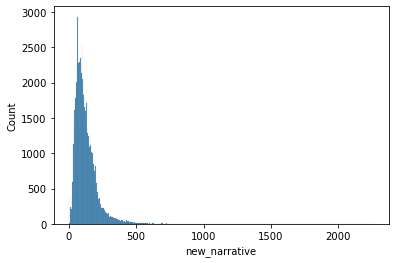

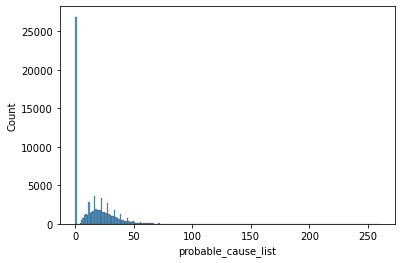

In [11]:
word_count_nn = aviation['new_narrative'].apply(lambda x: len(x.split()))
word_count_pc = aviation['probable_cause_list'].apply(lambda x: len(x.split()))
# descriptive stats about word counts
print(word_count_nn.describe())

# descriptive stats about word counts in probable cause
print(word_count_pc.describe())

# histogram of word count distribution in new_narrative
plt.figure()
sns.histplot(data = word_count_nn)
plt.show()

# histogram of word count distribution in probable_cause
plt.figure()
sns.histplot(data = word_count_pc)
plt.show()



Let's get a sense for the most common words. note that stop word removal, lemmatization has not been done here. In a future cell, the most common words with all the stop words etc removed will be explored

In [12]:
from collections import Counter
Counter(" ".join(aviation["new_narrative"].str.lower()).split()).most_common(100)

[('the', 1138772),
 ('to', 265824),
 ('and', 257714),
 ('a', 239276),
 ('of', 228124),
 ('was', 204755),
 ('pilot', 124790),
 ('that', 117557),
 ('he', 112348),
 ('in', 106530),
 ('airplane', 105125),
 ('on', 88689),
 ('.', 84176),
 ('at', 78957),
 ('with', 68360),
 ('an', 59741),
 ('engine', 55978),
 ('landing', 52763),
 ('during', 52505),
 ('were', 50363),
 ('from', 50337),
 ('had', 49054),
 ('not', 46978),
 ('for', 46792),
 ('flight', 45694),
 ('fuel', 42529),
 ('left', 41933),
 ('about', 40352),
 ('reported', 39952),
 ('after', 37443),
 ('no', 36638),
 ('right', 35422),
 ('aircraft', 32525),
 ('runway', 32046),
 ('acft', 30677),
 ('it', 30656),
 ('stated', 28126),
 ('as', 27670),
 ('by', 26839),
 ('when', 26452),
 ('his', 26057),
 ('gear', 25896),
 ('revealed', 25590),
 ('feet', 24735),
 ('power', 24671),
 ('&', 24497),
 ('then', 24217),
 ('accident', 23687),
 ('or', 23536),
 ('plt', 22645),
 ('examination', 21172),
 ('while', 21053),
 ('but', 20719),
 ('which', 19847),
 ('did', 19

Perform cleanup of the narrative data

In [13]:
# create the functions to lemmatize, stem and perform stop word removal on the dataset

stemmer = SnowballStemmer("english")

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

# Tokenize and lemmatize and remove stop words
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
            
    return result

In [21]:
# Testing a random new_narrative to ensure that preprocessing looks good
doc_sample = aviation['new_narrative'][1117]
print("Original document: ")
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)

print("\n\nTokenized and lemmatized document: ")
print(preprocess(doc_sample))

Original document: 
['The', 'foreign', 'authority', 'was', 'the', 'source', 'of', 'this', 'information.', 'On', 'November', '10,', '2014,', 'about', '1723', 'universal', 'coordinated', 'time,', 'a', 'Beech', 'A36,', 'Brazilian', 'registration', 'PT-WVM,', 'was', 'destroyed', 'when', 'it', 'impacted', 'terrain', 'in', 'Macarani,', 'Brazil', 'after', 'an', 'inflight', 'loss', 'of', 'control.', '', 'The', 'pilot', 'and', 'two', 'passengers', 'were', 'fatally', 'injured.', '', 'The', 'flight', 'originated', 'at', 'Deputado', 'Luis', 'Eduardo', 'Magalhaes', 'International', 'Airport', '(SBSV),', 'Salvador,', 'Brazil,', 'and', 'was', 'destined', 'for', 'Belo', 'Horizonte', '–', 'Pampulha', 'Airport', '(SBBH),', 'Pampulha,', 'Brazil.', '', 'The', 'personal', 'flight', 'was', 'conducted', 'under', 'Brazilian', 'flight', 'regulations.', '', '.']


Tokenized and lemmatized document: 
['foreign', 'author', 'sourc', 'inform', 'novemb', 'univers', 'coordin', 'time', 'beech', 'brazilian', 'registr',

In [35]:
# preprocessing looks good, going to apply it to the entire new_narrative. probable_cause has been ignored for this analysis
processed_new_narratives = []


# create processed datasets for new_narrative, narratiev and probable_cause_list
for doc in aviation['new_narrative']:
    processed_new_narratives.append(preprocess(doc))

In [36]:
# add the processed_new_narratives column to the aviation dataset
aviation['processed_new_narratives'] = processed_new_narratives

# creating dictionary with words and number of times the word appears using gensim
new_narrative_dict = gensim.corpora.Dictionary(processed_new_narratives)

print(aviation['processed_new_narratives'].sample(5))

37891                                                                                                                                                                                                                                                                                     [foreign, author, sourc, inform, april, atlant, standard, time, dehavilland, oper, dolphin, express, airlin, crash, takeoff, roll, virgin, gorda, airport, british, virgin, island, flight, schedul, intern, passeng, commut, flight, visual, meteorolog, condit, prevail, time, flight, plan, file, airplan, substanti, damag, captain, offic, passeng, report, injuri, passeng, receiv, minor, injuri, flight, origin, time, accid]
48835                                                                                                                                                                                                                                                                                                   

Check out the most common words once data has been processed

In [37]:
new_narrative_dict.most_common(100)

[('pilot', 144611),
 ('airplan', 130332),
 ('land', 93926),
 ('engin', 67363),
 ('flight', 63560),
 ('runway', 54595),
 ('leav', 48292),
 ('report', 48059),
 ('fuel', 47458),
 ('right', 40530),
 ('accid', 38596),
 ('power', 38322),
 ('aircraft', 38093),
 ('acft', 33608),
 ('state', 32053),
 ('feet', 32009),
 ('control', 31003),
 ('gear', 30596),
 ('grind', 29308),
 ('airport', 29167),
 ('reveal', 28403),
 ('nose', 27543),
 ('wing', 26530),
 ('time', 25588),
 ('examin', 25488),
 ('takeoff', 25290),
 ('impact', 24508),
 ('turn', 22498),
 ('approach', 21919),
 ('damag', 21665),
 ('helicopt', 21169),
 ('oper', 20861),
 ('wind', 19089),
 ('attempt', 17345),
 ('tank', 17112),
 ('main', 16637),
 ('say', 16433),
 ('degre', 16176),
 ('area', 16053),
 ('tree', 15725),
 ('mechan', 15521),
 ('lose', 15518),
 ('roll', 15480),
 ('wit', 14811),
 ('field', 14475),
 ('fli', 14342),
 ('hour', 14245),
 ('condit', 13967),
 ('indic', 13801),
 ('strike', 13741),
 ('student', 13422),
 ('terrain', 13071),
 ('

### Task 3: Perform initial exploratory analysis of the narrative text, analyzing the use of words over time

In [38]:
# get out the year and decade for the data
aviation['year'] = pd.DatetimeIndex(aviation['EventDate']).year
aviation['decade'] = ((0.1*aviation['year']).apply(np.floor)*10)

# only 3 of the datapoints do not have dates associated with them, so it should be ok to lose this small amount of information for text modeling

# for loop that generates the top 10 words used every decade and returns them as the metric number of mentions per document. this allows for comparison across decades 
for decade in  range(int(min(aviation['decade'])), int(max(aviation['decade'])+10), 10):
    aviation_subset = aviation[aviation['decade'] == decade]
    no_entries = len(aviation_subset)
    decade_dict = gensim.corpora.Dictionary(aviation_subset['processed_new_narratives'])
    n = 10 # top n words that will be returned 
    most_common = list(map(list, decade_dict.most_common(n))) 
    # divide the most common by the number of entries to get a sense of mentions per document for a given word. if list is empty, don't do the loop
    if len(most_common) == n:
        for i in range(0,n):
            most_common[i][1] = round(most_common[i][1]/no_entries, 1)    
    print("\nthe decade is: ",decade, "\nand the number of entries in this decade is: ", no_entries)
    print(most_common)



the decade is:  1940 
and the number of entries in this decade is:  1
[['creek', 2.0], ['depart', 2.0], ['moos', 2.0], ['pilot', 2.0], ['river', 2.0], ['selway', 2.0], ['terrain', 2.0], ['wreckag', 2.0], ['airstrip', 1.0], ['april', 1.0]]

the decade is:  1950 
and the number of entries in this decade is:  0
[]

the decade is:  1960 
and the number of entries in this decade is:  1
[['airplan', 4.0], ['cross', 2.0], ['flight', 2.0], ['park', 2.0], ['personnel', 2.0], ['terrain', 2.0], ['accid', 1.0], ['aircraft', 1.0], ['area', 1.0], ['august', 1.0]]

the decade is:  1970 
and the number of entries in this decade is:  3
[['pilot', 3.3], ['aircraft', 2.3], ['feet', 1.7], ['mountain', 1.7], ['accid', 1.3], ['flight', 1.3], ['wreckag', 1.3], ['airport', 1.0], ['report', 1.0], ['condit', 1.0]]

the decade is:  1980 
and the number of entries in this decade is:  24685
[['acft', 1.3], ['land', 0.9], ['pilot', 0.7], ['aircraft', 0.5], ['leav', 0.4], ['fuel', 0.4], ['engin', 0.4], ['state', 0.

Interesting to note that although words are relatively similar across decades, in the 1980s acft is the most common word and is just a synonym for aircraft. These words stop showing up as much as time progresses and language used evolves. In the 90s both aircraft and airplane are common words and in the 00s and 10s they stop being used altogether in the top 10.

Additionally, many abbreviations exist within the dataset. all of these have not been fully explored or captured but 
a modified version of this would include those in order to get some discernable topics, this is an indication we may need to trim down the dictionary prior to training the model

### Task 4: Use topic modeling or any other text clustering methodology to cluster/group the incidents based on the narrative text and/or probable cause descriptions. Come up with a short name for each topic or cluster you identify to make it easy to report on.

Prepare data for modeling

In [39]:
# filter out overly common words from the texts. i've used 0.1. ideally this will lead to more unique responses that account 
# for time specific terms used (such as acft which may be decade specific) 
new_narrative_dict.filter_extremes(no_below=15, no_above=0.1, keep_n= 100000)

# create the bag of words
bow_corpus_nn = [new_narrative_dict.doc2bow(doc) for doc in processed_new_narratives]

In [41]:
# check out the bow for random observations
bow_doc_x = random.choice(bow_corpus_nn)
for i in range(len(bow_doc_x)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_x[i][0], 
                                                     new_narrative_dict[bow_doc_x[i][0]], 
                                                     bow_doc_x[i][1]))

Word 15 ("local") appears 1 time.
Word 20 ("privat") appears 1 time.
Word 39 ("complet") appears 1 time.
Word 208 ("issu") appears 2 time.
Word 297 ("inch") appears 2 time.
Word 556 ("cover") appears 1 time.
Word 973 ("occur") appears 1 time.
Word 1026 ("work") appears 1 time.
Word 1039 ("determin") appears 1 time.
Word 1150 ("deep") appears 2 time.
Word 1472 ("sink") appears 1 time.
Word 1684 ("notam") appears 2 time.
Word 2196 ("pertain") appears 1 time.
Word 2396 ("depth") appears 1 time.
Word 2775 ("snow") appears 5 time.
Word 3402 ("rancher") appears 1 time.
Word 4804 ("arpt") appears 2 time.
Word 4855 ("aprx") appears 1 time.


The cell below is commented out but was used to determine the number of topics using the elbow method for the coherence score. Note that this takes quite some time to run. 

In [42]:
# # Determine optimal number of topics for a given model. Note that this can take quite some time. I've commented this out for the
# # time being so that if this code is run locally on your own machine, it doesn't take forever to run
# num_of_topics = []
# coherence_score = []

# for i in range(2,20):
#     lda_model = gensim.models.LdaMulticore(bow_corpus_nn, 
#                                    num_topics = i, 
#                                    id2word = new_narrative_dict,                                    
#                                    passes = 10,
#                                    workers = 2)
#     num_of_topics.append(i)
    
#     coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_new_narratives, dictionary=new_narrative_dict, coherence='c_v')
#     coherence_lda = coherence_model_lda.get_coherence()
#     print('\nCoherence Score: ', coherence_lda)
    
#     coherence_score.append(coherence_lda)
    
# # create plot of number of topics vs complexity
# plt.figure()
# sns.lineplot(x = num_of_topics, y = coherence_score)
# plt.xlabel('Number of Topics')
# plt.ylabel('Complexity from c_v method')
# plt.show()

Model looks good around 5 topics. I've set a random state here for reproducibility, but in my experience this doesn't always give reproducible results across machines. The topics detected appear to have the same key words and similar weights but the topic number may be jumbled

In [43]:
# Generate the model. A seed has been set using random_state
lda_model_final = gensim.models.LdaMulticore(bow_corpus_nn, 
                                   num_topics = 5, 
                                   id2word = new_narrative_dict,                                    
                                   passes = 10,
                                   workers = 2,
                                   random_state=122593)

In [44]:
# Print out the final topics
for idx, topic in lda_model_final.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n") 
    

Topic: 0 
Words: 0.043*"tank" + 0.015*"carburetor" + 0.012*"quit" + 0.011*"gallon" + 0.010*"pump" + 0.010*"glider" + 0.010*"start" + 0.009*"water" + 0.009*"check" + 0.009*"selector"


Topic: 1 
Words: 0.018*"arpt" + 0.016*"weather" + 0.010*"crash" + 0.010*"instrument" + 0.009*"cessna" + 0.009*"receiv" + 0.009*"radar" + 0.009*"visibl" + 0.008*"plan" + 0.008*"cloud"


Topic: 2 
Words: 0.033*"helicopt" + 0.016*"crash" + 0.014*"rotor" + 0.010*"line" + 0.009*"attitud" + 0.009*"tail" + 0.008*"water" + 0.008*"maneuv" + 0.008*"descend" + 0.007*"enter"


Topic: 3 
Words: 0.013*"fail" + 0.010*"separ" + 0.009*"propel" + 0.008*"cylind" + 0.007*"instal" + 0.006*"door" + 0.006*"assembl" + 0.006*"mainten" + 0.006*"fractur" + 0.006*"investig"


Topic: 4 
Words: 0.024*"student" + 0.015*"brake" + 0.013*"gust" + 0.012*"appli" + 0.011*"touchdown" + 0.011*"instructor" + 0.010*"flap" + 0.010*"veer" + 0.010*"collaps" + 0.010*"taxi"




In [47]:
# function that generates the top scoring topic and score from the lda model above
def topic_assignment(text):
    bow_vector =  new_narrative_dict.doc2bow(preprocess(text))
    top_topic = sorted(lda_model_final[bow_vector], key=lambda tup: -1*tup[1])
    topic = top_topic[0][0]
    score = top_topic[0][1]
    return topic, score

When using 5 topics, there are 4 general themes that emerge that are decipherable. 
1. Topic 0: Mechanical accident
2. Topic 1: Weather accident
3. Topic 2: Helicopter accident
4. Topic 3: Unknown Topic accident
5. Topic 4: Student Pilot accident

In [59]:
# Check out some random narratives and look at what topics the model generates
random_doc = random.choice(aviation['new_narrative'])

print(random_doc)
topic_assignment(random_doc)

 THE PILOT AND OPERATOR DID A WALK AROUND PREFLIGHT OF THE HELICOPTER WHILE IT WAS SECURED TO A FLATBED TRAILER.   THE PILOT RELEASED THE LEFT TIE DOWN STRAP ON THE LEFT SKID, BOARDED, AND STARTED THE HELICOPTER.   THE PILOT ATTEMPTED TO HOVER-TAXI OFF THE FLATBED TRAILER.   THE HELICOPTER ROLLED OVER ON ITS RIGHT SIDE AND CRASHED INTO THE GROUND BESIDE THE TRAILER.   THE HELICOPTER'S BLADES CONTACTED THE GROUND AND A VEHICLE WHICH WAS PARKED 30-50 FEET AWAY.   AFTER EXITING THE HELICOPTER, THE PILOT NOTED THE RIGHT REAR SKID TIE DOWN WAS STILL LOCKED OVER THE SKID AND ATTACHED TO THE TRAILER.  .


(2, 0.8086752)

Manual checking indicates that there is definitely room for improvement but topic clusters seemed to be generally assigned correctly

The cell below is an attempt at evaluating the separation between topic clusters

In [45]:
# visualize the topic clustering. did the algorithm do a good job?

pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model_final, bow_corpus_nn, new_narrative_dict)

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.252998 -0.087784       1        1  22.564838
4      0.031524  0.202471       2        1  22.429059
3      0.153959 -0.170600       3        1  20.311910
2     -0.030268  0.060863       4        1  19.726774
0      0.097783 -0.004951       5        1  14.967419, topic_info=          Term          Freq         Total Category  logprob  loglift
773       tank  16517.000000  16517.000000  Default  30.0000  30.0000
88    helicopt  16521.000000  16521.000000  Default  29.0000  29.0000
489    student  13797.000000  13797.000000  Default  28.0000  28.0000
4804      arpt  10563.000000  10563.000000  Default  27.0000  27.0000
35       brake   8735.000000   8735.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
160       note   2275.543092   7494.144764   Topic5  -5.1198   0.7074
8       experi   2208.189784   6892.100840   Topic5  -5.1498   0.7611
382      crash   2456.209903  16547.844272   Topic5  -5.0434  -0.0083
563       evid   2240.916587   9393.365192   Topic5  -5.1351   0.4662
1180      fail   2221.368931  12839.160589   Topic5  -5.1439   0.1449

[348 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
113       2  0.964147       abort
113       3  0.035376       abort
806       1  0.998589  acknowledg
241       3  0.999081      actuat
416       1  0.886426       advis
...     ...       ...         ...
755       5  0.119332        wire
238       1  0.417568     wreckag
238       3  0.028082     wreckag
238       4  0.459837     wreckag
238       5  0.094483     wreckag

[742 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 4, 3, 1])

Topic clusters appear to be relatively well separated and checking out the top-30 most relevant terms gives some confidence that the LDA topic clustering works.

In [60]:
# Replace the topic number with an identifiable topic. Note that this may change for your own run of the model despite the random seed that was set. 
topic_replacement_dict = { 0:'Mechanical', 1:'Weather', 2: 'Helicopter', 3: 'Unknown', 4: 'Student'}

# generate the topics dataframe
topics = pd.DataFrame(aviation['new_narrative'].apply(topic_assignment).tolist()).rename(columns = {0: 'topic', 1:'score'})
topics['topic'] = topics['topic'].replace(topic_replacement_dict)

# append the topics dataframe to the aviation dataframe and filter down to values that have at least one small word in them
aviation_clustered = pd.concat([aviation, topics], axis=1)
aviation_clustered = aviation_clustered[aviation_clustered['new_narrative'].apply(lambda x: len(x) > 5)]

### Task 5: Create a chart that you feel conveys one important relationship in the data.

For this exercise, I'm going to investigate the relationship between fatality and topic cluster to get an understanding of which accidents are the most fatal.

C:\Users\Prudvi\AppData\Local\Temp\ipykernel_8628\1415080353.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fatality['fatality_ind'] = fatality['InjurySeverity'].apply(lambda x: 'Non-Fatal' if x == 'Non-Fatal' else 'Fatal')


<Figure size 432x288 with 0 Axes>

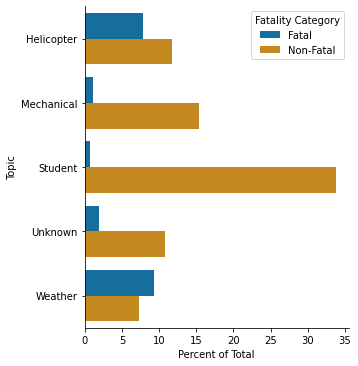

        topic fatality_ind  new_narrative  percent_share  \
0  Helicopter        Fatal           5739       7.788771   
1  Helicopter    Non-Fatal           8669      11.765265   
2  Mechanical        Fatal            860       1.167162   
3  Mechanical    Non-Fatal          11357      15.413325   
4     Student        Fatal            532       0.722012   
5     Student    Non-Fatal          24910      33.806984   
6     Unknown        Fatal           1385       1.879674   
7     Unknown    Non-Fatal           7977      10.826106   
8     Weather        Fatal           6853       9.300653   
9     Weather    Non-Fatal           5401       7.330049   

   percent_share_fatality  
0                0.373414  
1                0.148661  
2                0.055957  
3                0.194756  
4                0.034615  
5                0.427170  
6                0.090116  
7                0.136794  
8                0.445898  
9                0.092619  


In [61]:
# How do topics vary depending on whether or not a fatality was reported in the crash

# Begin by feature engineering injury severity as binarily fatal or non fatal. First nans must be removed from injury severity. 
# Unavailable and Incident are confusing indicators and will be removed from the dataset.
# There aren't many observations with this tag, ~190 and ~3050 respectively, making up about 5% of the data 
fatality = aviation_clustered[(aviation_clustered['InjurySeverity'] != np.nan) & (aviation_clustered['InjurySeverity'] != 'Incident') & (aviation_clustered['InjurySeverity'] != 'Unavailable')]
fatality['fatality_ind'] = fatality['InjurySeverity'].apply(lambda x: 'Non-Fatal' if x == 'Non-Fatal' else 'Fatal')

# determine the count and calculate the percentage share of total accidents for each fatality (Non-Fatal vs Fatal) category
topic_by_fatality = fatality.groupby(['topic', 'fatality_ind'])['new_narrative'].count().reset_index()
# this calculates percent share of all observations
topic_by_fatality['percent_share'] = topic_by_fatality['new_narrative'] * 100 / topic_by_fatality['new_narrative'].sum()
# this calculates percent share within the fatality category (so percent of all fatal or non-fatal accidents)
topic_by_fatality['percent_share_fatality'] = topic_by_fatality.groupby('fatality_ind')['new_narrative'].apply(lambda x: x/x.sum())

# Check out the interaction between fatality in a side-by-side barplot
plt.figure()
g = sns.catplot(y = 'topic', x = 'percent_share', hue = 'fatality_ind', data = topic_by_fatality, kind = 'bar', palette = 'colorblind')
g._legend.remove()
plt.legend(title = 'Fatality Category')
plt.xlabel('Percent of Total')
plt.ylabel('Topic')
plt.show()

# print the dataframe

print(topic_by_fatality)